<a href="https://colab.research.google.com/github/CatalinaEspejo/Evaluacion_2021-1/blob/main/Examen_2021_1_01_enunciado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Primer Examen 15%

A) Cargando el archivo JSON: 
* https://github.com/restrepo/anomaly/raw/main/solutions.json.gz

en Pandas

1) Adicione una columna nueva `'smax'` con el valor máximo en valor absoluto de la lista de enteros de la correspondiente entrada en la columna '`solution`'
2) Adicione dos columnas nuevas: `'sum_s'` (`sum_s³`) con el resultado de la suma (al cubo) de todos los números de la lista de enteros de la correspondiente entrada en la columna '`solution`'
3) Usando como semilla el número de su cédula, genere un número entero de forma aleatoria entre 0 y 390073. Seleccione el la fila correspondiente a ese número entero y construya un polinomio con esos coeficientes. Encuentre las raices reales de ese polinomio y realice el correspondiente gráfico incluyendo: el polinomio generado, sus raices (como puntos en gráfico) y la derivada del polinomio. Optimize el rango de valores en el eje $x$ y en el eje $y$ del gráfico, de manera que el polinomio y sus raices se visualicen de la mejor forma posible. (Sugerencia → use: `plt.ylim(ymin,ymax)` ). Se tendrá en cuenta la estética del gráfico presentado incluyendo la rotulación adecuada del mismo


In [ ]:
<

In [193]:
import pandas as pd
import numpy as np
import json 
import matplotlib.pylab as plt
from scipy import optimize

In [194]:
df=pd.read_json('https://github.com/restrepo/anomaly/raw/main/solutions.json.gz')  ## Leemos el archivo

In [195]:
C = [] #creo la lista vacia
for i in range (0,len(df["solution"])): #Valores Abs de la colum solucion 
  C.append(np.max(np.abs(df["solution"][i]))) 

df["smax"]=C #Creo la columna que contiene los valores abs 

df #MOstramos el resultado

L = []  #Creamos lista vacia
for i in df["solution"]: 
  L.append(np.sum(i)) #Para obtener el resultado de la suma 

df["sum_s"]= L  
df

V = []  #Creamos la lista vacia 
for i in df["solution"]:
  V.append(np.sum(i)**3)   #Para obtener el resultado de la suma al cubo 

df["sum_s^3"]= V
df # Mostramos el resultado 

,l,k,solution,gcd,n,smax,sum_s,sum_s^3
0,"[-1, 0, -1, 0, -1]","[-1, 0, -1, 1, -1]","[1, 4, 4, 4, -5, -5, -5, -5, -5, 6, 6]",1,11,6,0,0
1,"[-1, 1]","[-1, 0, -1]","[1, 2, 2, -3, -3, -3, 4]",1,7,4,0,0
2,"[1, -1, 0, 1, -1]","[-2, 0, -1, -2, 0]","[1, 1, -2, -2, -3, -3, 5, 5, 5, 5, -6, -6]",2,12,6,0,0
3,"[-1, 1, -1, 1, -1]","[-2, -1, 0, -1, 0]","[1, 1, 1, 1, 2, 2, 2, -3, -4, -4, -6, 7]",1,12,7,0,0
4,"[1, 0, 1, 0, -1]","[-2, -1, -2, -1, 0]","[1, 1, 1, -2, -2, -5, -5, 6, 6, 7, -8]",1,11,8,0,0
...,...,...,...,...,...,...,...,...
390069,"[-3, -15, -6]","[-3, 8, 9]","[8, -9, -9, 11, 25, -29, -29, 32]",36,8,32,0,0
390070,"[-10, -5, -15]","[-10, -12, 12]","[5, 5, 5, -17, -27, -27, 28, 28]",100,8,28,0,0
390071,"[15, -1, 15]","[-14, -13, -14]","[14, -15, -16, 17, -30, 31, 31, -32]",1,8,32,0,0
390072,"[-15, -9, -1]","[-13, -14, -12]","[11, -13, -15, 19, 23, -26, -30, 31]",18,8,31,0,0


In [196]:
#Tomando un número aleatorio entre 0 y 390073 c
np.random.seed(1002461801) #Cedula
x = np.random.randint(1,390073)
df.loc[x]


l                                     [-2, -1, 1, -3, -2]
k                                       [0, -3, 0, 3, -2]
solution    [3, 3, -6, -8, 12, 14, -20, 23, -24, -24, 27]
gcd                                                     5
n                                                      11
smax                                                   27
sum_s                                                   0
sum_s^3                                                 0
Name: 140362, dtype: object

In [199]:
z = df.loc[x]
coeficientes = z['solution']
#polinomio con los coeficientes
polinomi = np.poly1d(coeficientes)
polidev=polinomi.deriv() # derivada
print(polinomi)

   10     9     8     7      6      5      4      3      2
3 x  + 3 x - 6 x - 8 x + 12 x + 14 x - 20 x + 23 x - 24 x - 24 x + 27


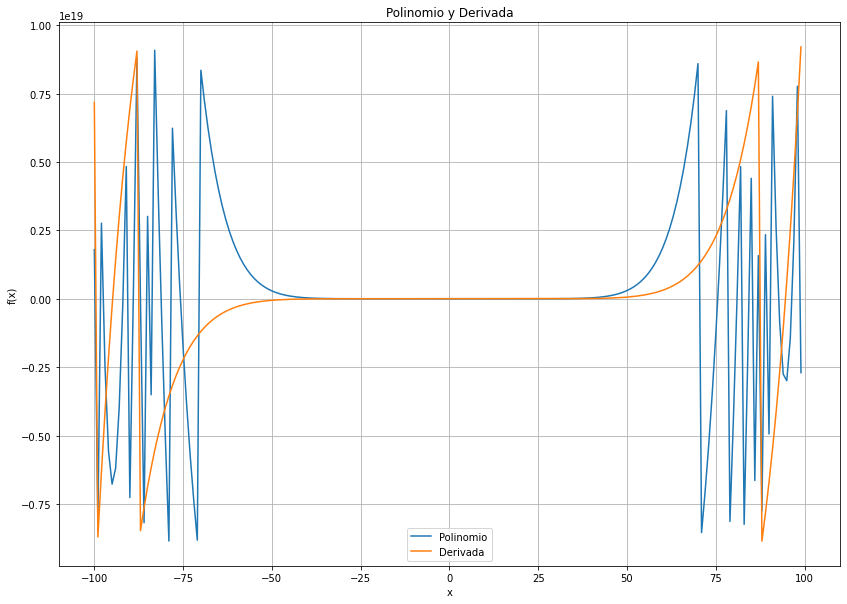

In [200]:
x = np.arange(-100, 100, 1)
plt.figure(figsize=(14, 10))
plt.title('Polinomio y Derivada')

plt.xlabel('x')
plt.ylabel('f(x)')

plt.plot(x, polinomi(x), label='Polinomio')
plt.plot(x, polidev(x), label='Derivada')


plt.hlines(0, 100, 100)
plt.legend()
plt.grid() #Grafico con su respectiva derivada 

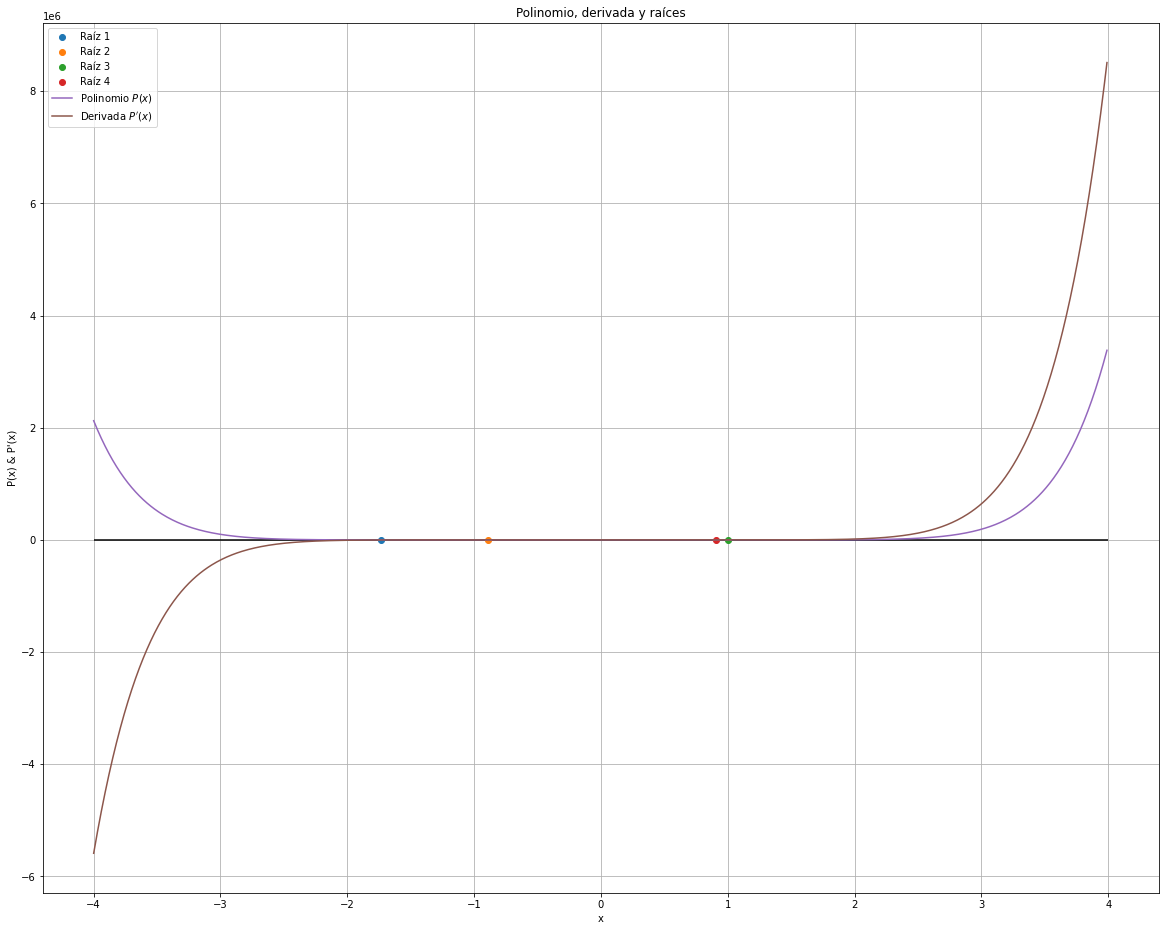

In [201]:
#Polinomio con sus raíces y derivada
 # Raíces del polinomio

x = np.arange(-4, 4, 0.01)
plt.figure(figsize=(20, 16))

j = 1
for i in range(ra.size):
  if (abs(ra[i].imag) < 1.0e-17):
    plt.plot(ra[i].real, 0, 'o', label="Raíz %d" %j)
    j += 1
plt.title('Polinomio, derivada y raíces')

plt.xlabel('x')
plt.ylabel("P(x) & P'(x)")
plt.hlines(0, -4, 4)


plt.plot(x, polinomi(x), label='Polinomio $P(x)$')
plt.plot(x, polidev(x), label="Derivada $P'(x)$")

plt.legend()
plt.grid()

B)

I) Usando como semilla el número de su cédula, genere de forma aletoria un número entero entre 1 y 5

II) De acuerdo al entero obtenido, escoja una de las siguientes cinco funciones 
1. $$x\operatorname{e}^x=p\,, $$
2. $$\frac{\sin x}{x}=+p\,,$$
3. $$\frac{\sin x}{x}=-p\,,$$
4. $$\frac{\cos x}{x}=+p\,,$$
5. $$\frac{\cos x}{x}=-p\,,$$
III) Genere un número aleatorio entre 0 y 1 y asignelo al valor de $p$
IV) Encuentre la solución a la ecuación trascendental para el intervalo $x$ entre -10 y 10 y gráfique la correspondiente función trascendental y las correspondientes soluciones. . Se tendrá en cuenta la estética del gráfico presentado incluyendo la rotulación adecuada del mismo.

A modo de nota curiosa: estas ecuaciones trascendentales están asociadas a soluciones de la ecuación de Schödinger en mecánica cuántica: https://doi.org/10.1080/14786435.2015.1081425

In [202]:
import random
import random

random.seed(1002461801)
numero = np.random.randint(1,5)
numero

2

In [203]:
# Ecuacion numero 2


In [204]:
p = np.random.uniform(0,1) #Generamos el numero de 0, 1
p


0.9702018063512614

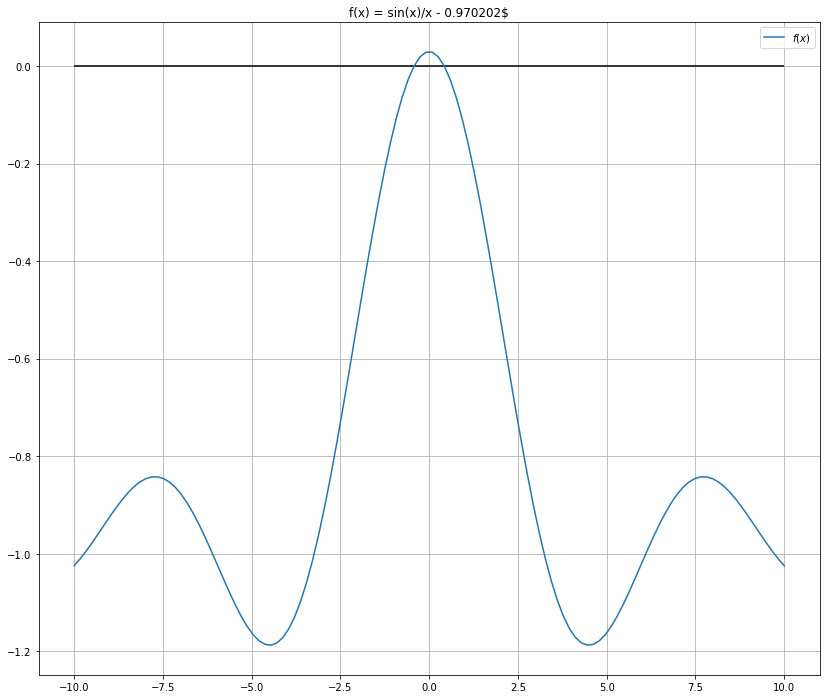

In [205]:
#Gráfica de la función

f = lambda x: np.sin(x)/x - p  #Funcion
x = np.linspace(-10, 10, 120)
plt.figure(figsize=(14, 12))
plt.title("f(x) = sin(x)/x - %lf$" %p)
plt.plot(x, f(x), label='$f(x)$')
plt.hlines(0, -10, 10)
plt.legend()
plt.grid()

In [206]:
# método de Newton 
S1 = optimize.newton(f, -5, tol=1.0e15)
S2 = optimize.newton(f, -3, tol=1.0e15)
S3 = optimize.newton(f, 3, tol=1.0e15)
S4 = optimize.newton(f, 5, tol=1.0e15)
print('Las raícesson:')
print('-> x = %lf' %S1)
print('-> x = %lf' %S2)
print('-> x = %lf' %S3)
print('-> x = %lf' %S4)


Las raícesson:
-> x = -17.214014
-> x = -0.329130
-> x = 0.329130
-> x = 17.214014


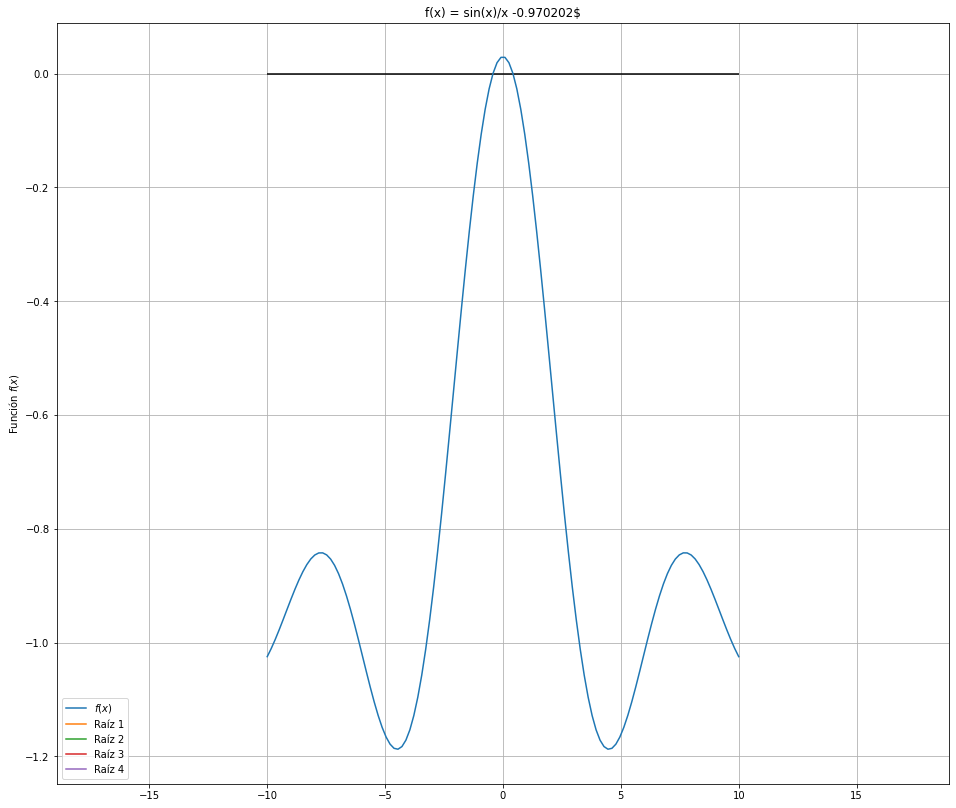

In [207]:
#Gráfico de la función
plt.figure(figsize=(16, 14))
plt.title("f(x) = sin(x)/x -%lf$" %p)
plt.plot(x, f(x), label='$f(x)$')
plt.plot(S1, 0, '-', label='Raíz 1')
plt.plot(S2, 0, '-', label='Raíz 2')
plt.plot(S3, 0, '-', label='Raíz 3')
plt.plot(S4, 0, '-', label='Raíz 4')
plt.hlines(0, -10, 10)
plt.ylabel('Función $f(x)$')
plt.legend()
plt.grid()